#Análisis Exploratorio de Datos (EDA) de Producción de Energía, Patrones y Anomalías de un Autogenerador
##realizado por:  Bayron A. Guamá

##resumen:
##1. Limpieza de datos
##2. Análisis y Visualización
##3. Conclusiones


###Fuente de datos: anonimo


#1. Carga de librerias, datos, identificación de nulos, limpieza de datos y creación de nuevas variables.

In [23]:


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#import janitor

Carga de Datos: Se carga la base de datos de producción de energía (de un autogenerador) desde un archivo Excel (DatosAutogeneradoresGranEscala.xlsx) en un DataFrame de pandas.

In [24]:
db = pd.read_excel("/content/DatosAutogeneradoresGranEscala.xlsx")

Breve Descripción del Contenido: Se visualizan las primeras filas del DataFrame para obtener una vista previa de la estructura y el contenido de los datos

In [25]:
print("---------  breve descripción del contenido -----------")
print("")
db.head()

---------  breve descripción del contenido -----------



,Día Consumo,Hora,Activa\n[kWh],Excedentes\n[kWh],Inductiva\n[kVArh],Capacitiva\n[kVArh]
0,2023/03/21,1,721.6252,0.0,34.5000,25.8752
1,2023/03/21,2,966.0000,0.0,140.8752,5.7500
2,2023/03/21,3,1313.8752,0.0,373.7500,0.0000
3,2023/03/21,4,1598.5000,0.0,580.7500,0.0000
4,2023/03/21,5,1541.0000,0.0,598.0000,0.0000


Resumen de Información Estadística: Se genera un resumen estadístico del DataFrame, incluyendo medidas como la media, la desviación estándar, los valores mínimo y máximo, y los cuartiles para las columnas numéricas.

In [26]:
print("---------  resumen información estadistica  -----------")
print("")
db.describe()

---------  resumen información estadistica  -----------



,Hora,Activa\n[kWh],Excedentes\n[kWh],Inductiva\n[kVArh],Capacitiva\n[kVArh]
count,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000
mean,12.500000,1056.601488,42.276330,332.386948,14.553082
std,6.922581,609.900048,168.384606,225.512182,57.526952
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,6.750000,513.906400,0.000000,140.875200,0.000000
50%,12.500000,1221.875200,0.000000,345.000000,0.000000
75%,18.250000,1578.375200,0.000000,474.375200,2.875200
max,24.000000,2190.750000,1380.000000,1247.750000,782.000000


Limpieza de Títulos de las Columnas: Se limpian los nombres de las columnas para facilitar su manejo. Esto incluye la eliminación de caracteres especiales, espacios y la conversión a minúsculas

In [27]:
## limpiar titulos de las columnas
db.columns = db.columns.str.replace('\n', ' ', regex=True)
db.columns = db.columns.str.strip()
db.columns = db.columns.str.replace(' ', '_')
db.columns = db.columns.str.lower()

Resumen de Información del Tipo de Variables: Se verifica el tipo de datos de cada columna y el número de valores no nulos utilizando db.info().

In [28]:
print("---------  resumen informacion tipo de variables  -----------")
print("")
db.info()

---------  resumen informacion tipo de variables  -----------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   día_consumo         8784 non-null   object 
 1   hora                8784 non-null   int64  
 2   activa_[kwh]        8784 non-null   float64
 3   excedentes_[kwh]    8784 non-null   float64
 4   inductiva_[kvarh]   8784 non-null   float64
 5   capacitiva_[kvarh]  8784 non-null   float64
dtypes: float64(4), int64(1), object(1)
memory usage: 411.9+ KB


Visualización de Valores Faltantes: Se genera un mapa de calor para visualizar la presencia de valores faltantes en el DataFrame

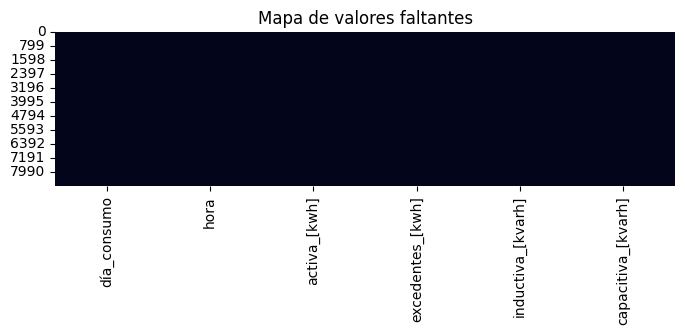

In [29]:
# Visualizar valores faltantes
plt.figure(figsize=(8,2))
sns.heatmap(db.isna(), cbar=False)
plt.title('Mapa de valores faltantes')
plt.show()

Conversión a Formato de Fecha: La columna 'día_consumo' se convierte a formato de fecha y hora para permitir análisis temporales.
Separación de Componentes de Fecha: Se extraen el año, el mes y el día de la columna 'día_consumo' en nuevas columnas separadas.
Información del DataFrame Actualizada: Se muestra la información actualizada del DataFrame después de agregar las nuevas columnas de fecha.

In [30]:
#para facilitar el manejo de la fecha, la vamos a pasar a formato date
db["día_consumo"] = pd.to_datetime(db["día_consumo"], format='%Y/%m/%d')
#mas formatos: %d/%m/%Y

In [31]:
#separamos en nuevas columnas el dia, mes y año.
db['año'] = db['día_consumo'].dt.year
db['mes'] = db['día_consumo'].dt.month
db['dia'] = db['día_consumo'].dt.day

In [32]:
#ordenar = db['dia'].unique() --> muestra los valores unicos de esta columna
#db['mes'].value_counts() --> cuenta los valores unicos de la columna
#sorted(ordenar)
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   día_consumo         8784 non-null   datetime64[ns]
 1   hora                8784 non-null   int64         
 2   activa_[kwh]        8784 non-null   float64       
 3   excedentes_[kwh]    8784 non-null   float64       
 4   inductiva_[kvarh]   8784 non-null   float64       
 5   capacitiva_[kvarh]  8784 non-null   float64       
 6   año                 8784 non-null   int32         
 7   mes                 8784 non-null   int32         
 8   dia                 8784 non-null   int32         
dtypes: datetime64[ns](1), float64(4), int32(3), int64(1)
memory usage: 514.8 KB


In [33]:
#df_agrupado = df[['Genre', 'Country']].groupby('Genre').count().reset_index().rename(columns = {'Country':'Cuenta'})
#db[['año','hora']]
db[['año','mes' ,'hora']].groupby('año').count()

,mes,hora
año,,
2023,6864,6864
2024,1920,1920


In [34]:
db.describe()

,día_consumo,hora,activa_[kwh],excedentes_[kwh],inductiva_[kvarh],capacitiva_[kvarh],año,mes,dia
count,8784,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000
mean,2023-09-19 12:00:00,12.500000,1056.601488,42.276330,332.386948,14.553082,2023.218579,6.513661,15.756831
min,2023-03-21 00:00:00,1.000000,0.000000,0.000000,0.000000,0.000000,2023.000000,1.000000,1.000000
25%,2023-06-20 00:00:00,6.750000,513.906400,0.000000,140.875200,0.000000,2023.000000,4.000000,8.000000
50%,2023-09-19 12:00:00,12.500000,1221.875200,0.000000,345.000000,0.000000,2023.000000,7.000000,16.000000
75%,2023-12-20 00:00:00,18.250000,1578.375200,0.000000,474.375200,2.875200,2023.000000,10.000000,23.000000
max,2024-03-20 00:00:00,24.000000,2190.750000,1380.000000,1247.750000,782.000000,2024.000000,12.000000,31.000000
std,NaN,6.922581,609.900048,168.384606,225.512182,57.526952,0.413306,3.451430,8.812031


Agrupación y Conteo por Año: Se agrupan los datos por año y se cuenta el número de registros para cada año, mostrando la distribución temporal de los datos.

In [35]:
db[['año','activa_[kwh]']].groupby('año').mean()

,activa_[kwh]
año,
2023,1057.412447
2024,1053.702308


In [36]:
db_2023 = db[db['año'] == 2023]

Estadísticas por Año: Se calcula la media de 'activa_[kwh]' agrupada por año para observar las tendencias anuales.
Filtrado por Año: Se crea un nuevo DataFrame (db_2023) conteniendo únicamente los datos del año 2023 para un análisis más detallado.

In [37]:
#datos estadisticos de activa_[kwh] agrupados por mes por mes

db_2023[['mes','activa_[kwh]']].groupby('mes').mean()
db_meses_2023 = pd.DataFrame(columns=['mean','median','std'])
db_meses_2023['mean'] = db_2023[['mes','activa_[kwh]']].groupby('mes').mean()
db_meses_2023['median'] = db_2023[['mes','activa_[kwh]']].groupby('mes').median()
db_meses_2023['std'] = db_2023[['mes','activa_[kwh]']].groupby('mes').std()

db_meses_2023

,mean,median,std
mes,,,
3,1103.510047,1233.3752,589.312884
4,884.018668,904.1876,632.913725
5,1001.350230,1116.9376,610.734109
6,1034.173539,1148.5626,600.341928
7,1018.611820,1162.9376,610.076487
8,1060.496401,1219.0002,584.490361
9,1089.956526,1249.1876,580.553973
10,1146.781175,1329.6876,599.216053
11,1208.107039,1426.0000,615.712175


#2. Analisis y Visualización

Visualización de la Media Mensual (2023): Se grafica la media de 'activa_[kwh]' por mes para el año 2023 en un gráfico de lineas para visualizar la tendencias generales

Observando la línea, podemos identificar la tendencia general de la energía activa promedio a lo largo de los meses. Por ejemplo, podemos ver en qué meses la producción promedio fue mayor o menor. La línea sube en algunos períodos y baja en otros, lo que sugiere variaciones estacionales; Colombia presenta un clima tropical lo cual explicaría dichos comportamientos.

En particular, se puede notar un valle en el mes de abril, seguido de un aumento gradual hasta un pico en el mes de noviembre, y luego un descenso en diciembre. La disminución en abril y diciembre puede significar que fueron meses bastante lluviosos.

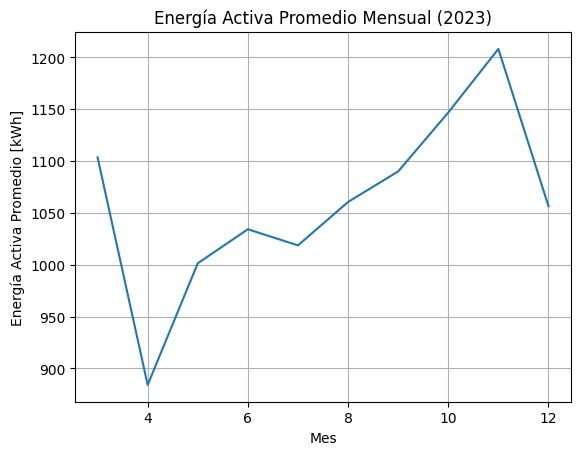

In [55]:
sns.lineplot(data = db_meses_2023, x='mes',y='mean')
plt.title('Energía Activa Promedio Mensual (2023)')
plt.xlabel('Mes')
plt.ylabel('Energía Activa Promedio [kWh]')
plt.grid(True)
plt.show()

In [39]:
#agrupar mes y dia para hacer boxplot

db_2023[['activa_[kwh]','mes','dia','hora']]

,activa_[kwh],mes,dia,hora
0,721.6252,3,21,1
1,966.0000,3,21,2
2,1313.8752,3,21,3
3,1598.5000,3,21,4
4,1541.0000,3,21,5
...,...,...,...,...
6859,94.8752,12,31,20
6860,92.0000,12,31,21
6861,94.8752,12,31,22
6862,92.0000,12,31,23


Seún el boxplot siguiente: Los meses con medianas más altas (como noviembre) generalmente tuvieron días con mayor producción típica que los meses con medianas más bajas (como abril).
Meses como marzo o abril muestran una mayor variabilidad en la producción diaria de energía en ese mes

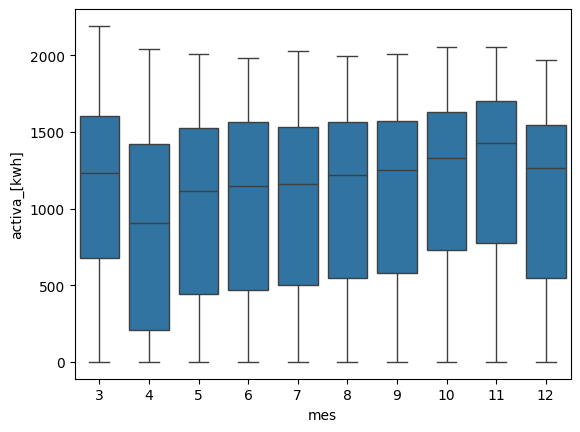

In [40]:
sns.boxplot(x='mes', y='activa_[kwh]', data=db_2023)
plt.show()
#este grafico es con el db_2023 sin filtrar
#ojo la linea de la mitad es la mediana no la media o promedio

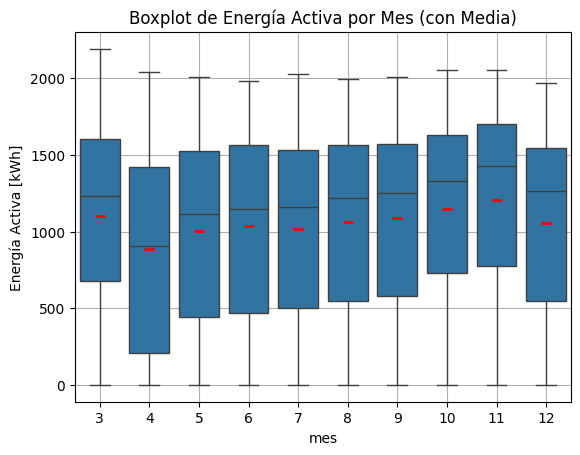

In [41]:
sns.boxplot(x='mes', y='activa_[kwh]', data=db_2023)

# Agregar la media como punto azul con línea
sns.pointplot(x='mes', y='activa_[kwh]', data=db_2023, color='red', estimator='mean', errorbar=None, markers='_', linestyles='')

# Títulos y estilo
plt.title('Boxplot de Energía Activa por Mes (con Media)')
plt.ylabel('Energía Activa [kWh]')
plt.grid(True)
plt.show()

In [42]:
#funcion graficar varios meses y cajas
def grafica_mes_box (mes):
  df_filtro = db_2023[db_2023['mes'] == mes][['activa_[kwh]', 'dia', 'hora']]
  plt.figure(figsize=(12, 6))
  sns.boxplot(x='dia', y='activa_[kwh]', data=df_filtro)
  plt.title(f'Boxplot de Energía del mes: {mes}')
  plt.ylabel('Energía Activa [kWh]')
  plt.show()

Según los boxplot mostrados a continuación:
Nota: los datos van desde el dia 21 (marzo) porque así está en la base de datos proporcionada.
-el análisis detallado de los boxplots diarios para cada mes de marzo a diciembre de 2023 revela la variabilidad intrínseca en la producción de energía activa a lo largo del año. Se observa una tendencia general en la que meses como noviembre presentan medianas diarias más altas, indicando una mayor producción típica en esos periodos. Crucialmente, los gráficos exponen la presencia recurrente de días con producciones de energía atípicamente bajas y distribuciones muy concentradas en valores reducidos, explicables en la mayoria de los casos a que fueron dias domingos o festivos, sin embargo en otras ocasiones podría ser debido a factores opretivos.

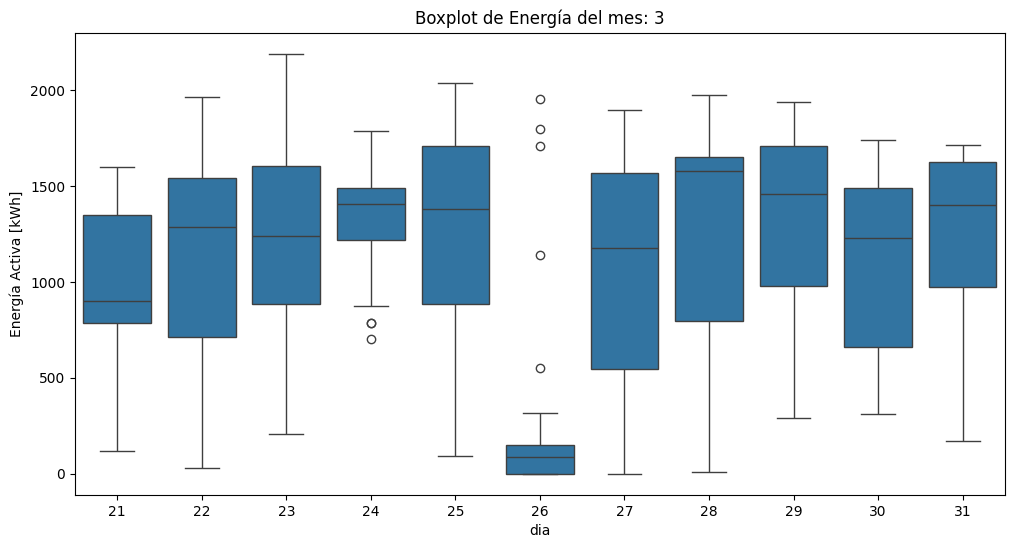

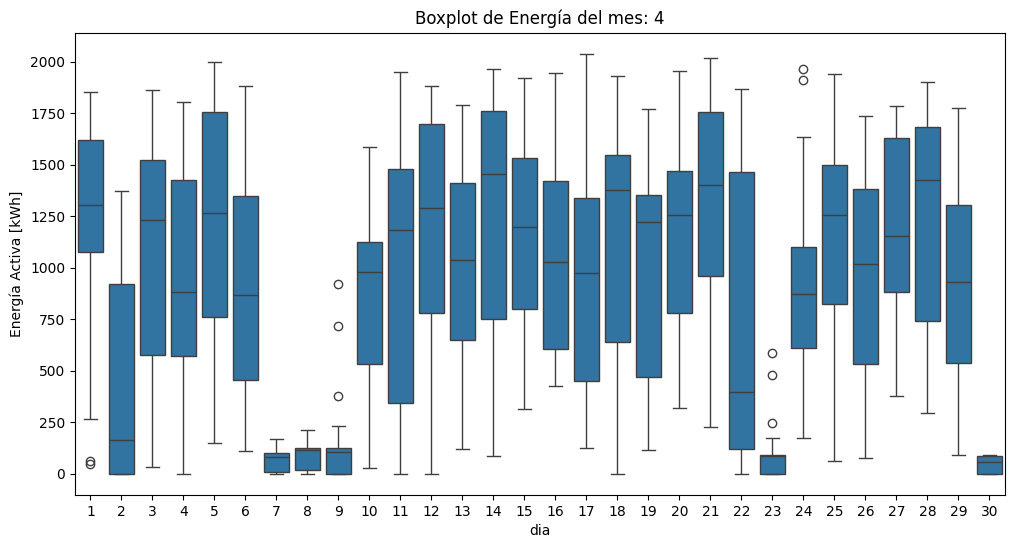

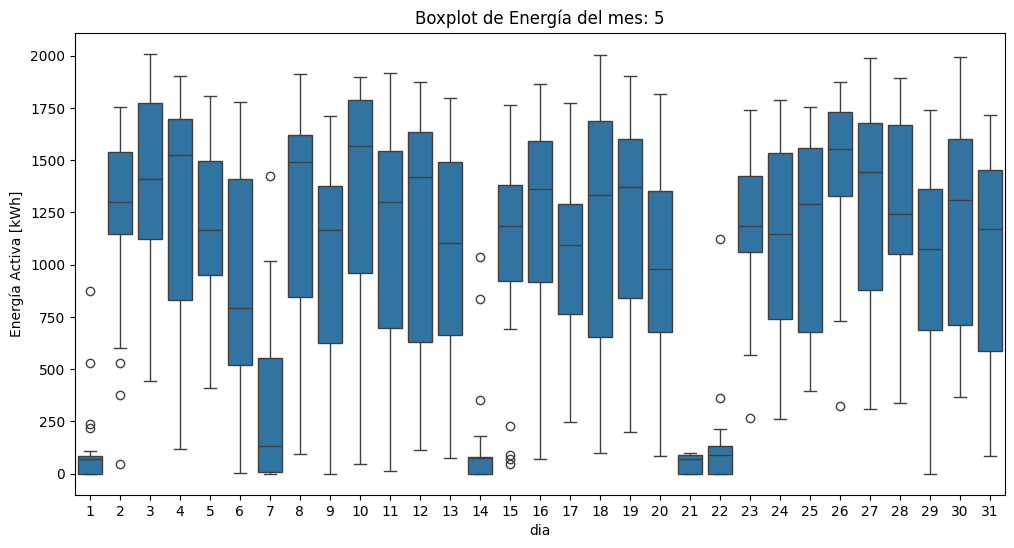

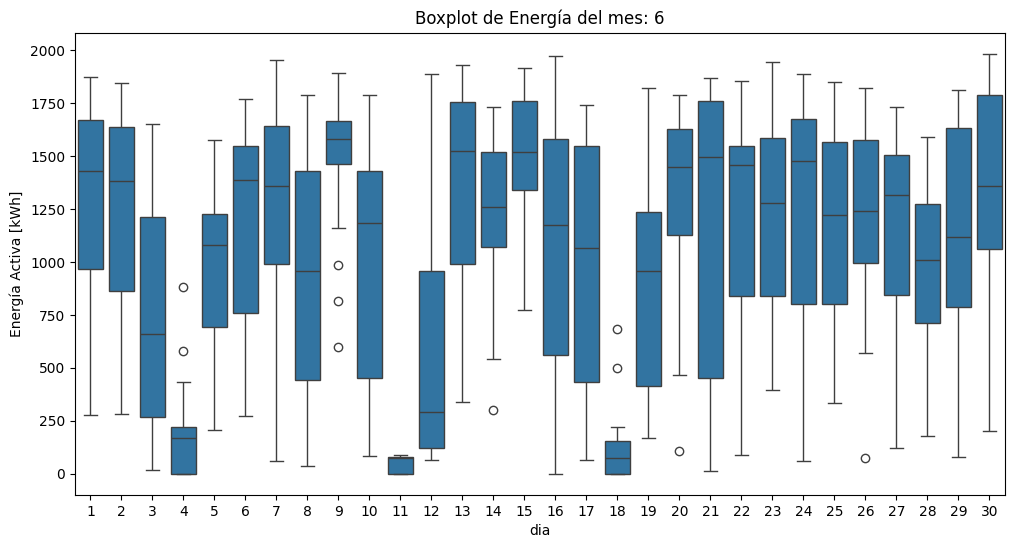

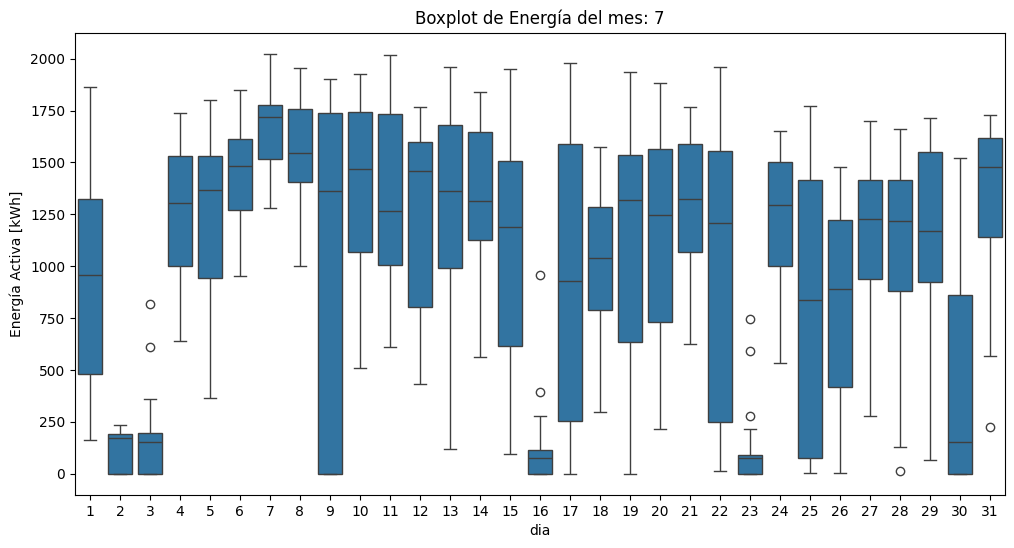

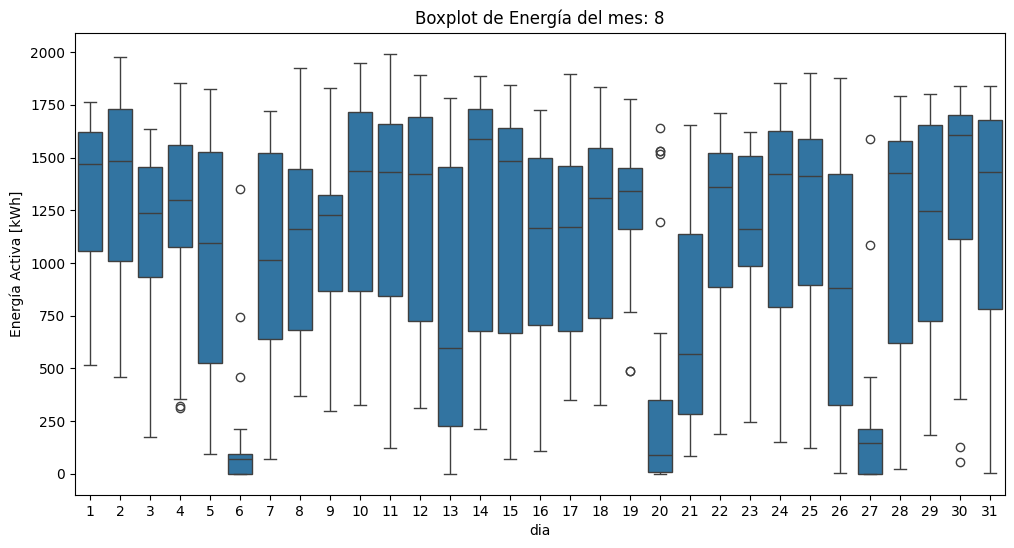

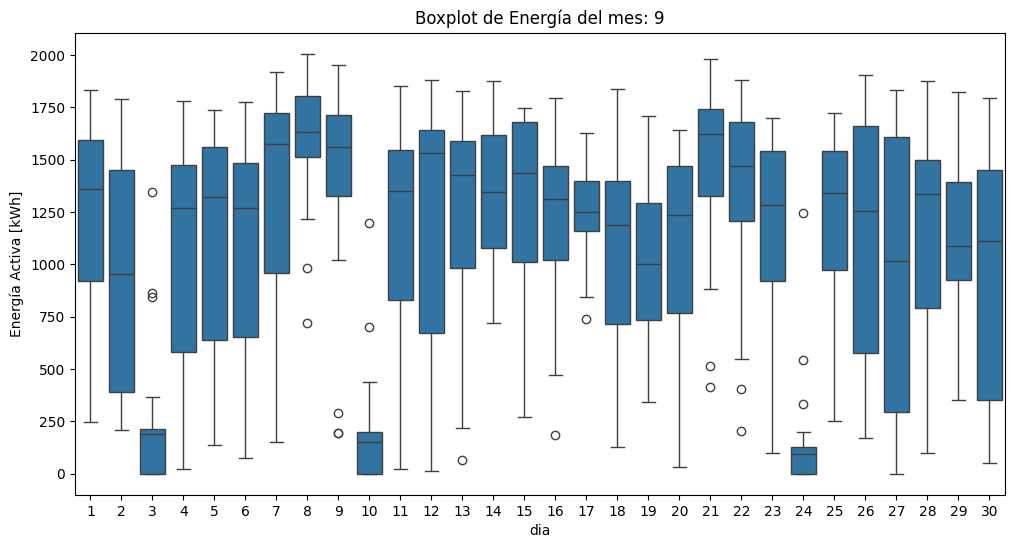

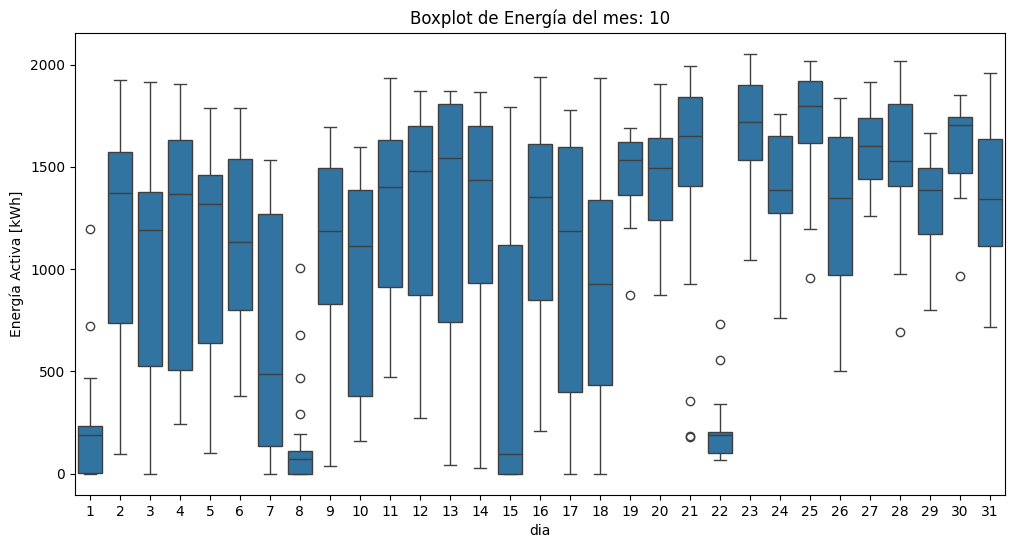

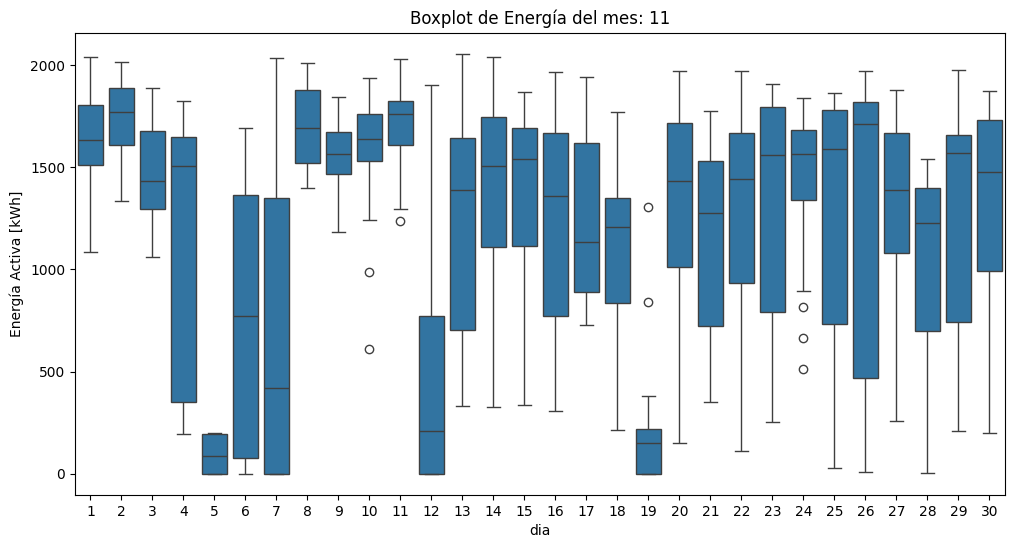

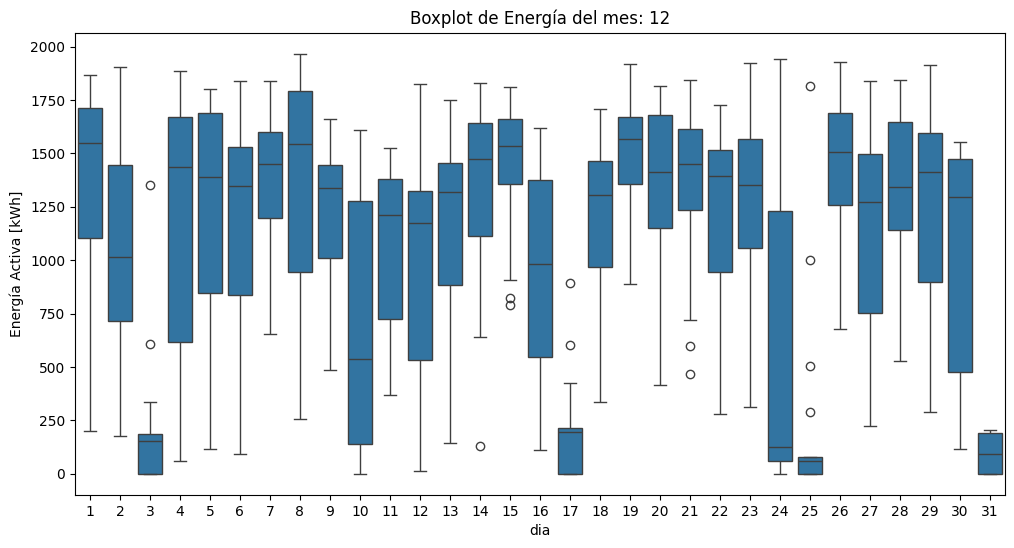

In [43]:
for i in range (3,13):
  grafica_mes_box(i)

In [46]:
#db_2023[['activa_[kwh]','mes','dia','hora']].groupby('mes','activa_[kwh]')
#db_2023[['mes','activa_[kwh]']].groupby('mes').mean()
db_energia_mes = db_2023[['mes','activa_[kwh]']].groupby('mes').sum()

In [58]:
import pandas as pd

data = {'mes': [4, 5, 6, 7, 8, 9, 10, 11, 12],
        'cantidad': [5, 4, 3, 4, 3, 3, 3, 2, 4]}

df_dias_baja_produccion = pd.DataFrame(data)

#display(df_dias_baja_produccion)

En la siguiente gráfica se muestra la cantidad de dias en cada mes en los que hubo una producción de energía atipicamente menor. Tener en cuenta que la mayoria coincide con domingos y festivos. Hay solo un dia de abril en el que no coincide con ese análisis, lo cual sugiere hubo otro tipo de evento para la disminución de energía.

Resaltar que al tratarse de una instalacion probablemente industrial o comercial, la actividad en los domingos se reduce y por ende la producción de enrgía también ya que al tratarse de uan actividad de autogeneración, la idea es producir energía para autoconsumo.

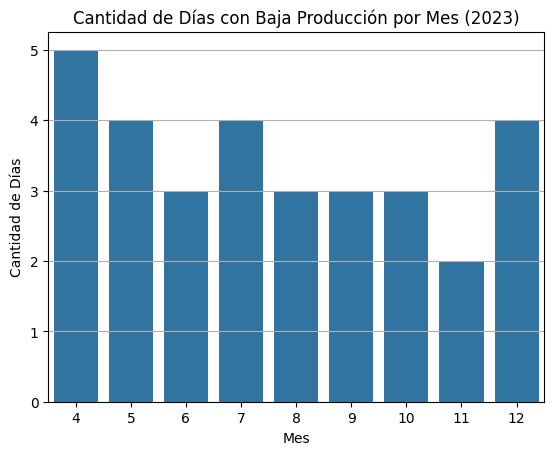

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.barplot(data=df_dias_baja_produccion, x='mes', y='cantidad')
plt.title('Cantidad de Días con Baja Producción por Mes (2023)')
plt.xlabel('Mes')
plt.ylabel('Cantidad de Días')
plt.grid(axis='y')
plt.show()

In [49]:
def grafica_dia_linea (mes):
  df_filtro_dia = db_2023[db_2023['mes'] == mes][['activa_[kwh]', 'dia']].groupby('dia').sum()
  plt.figure(figsize=(9, 4))
  sns.lineplot(x='dia', y='activa_[kwh]', data=df_filtro_dia)
  plt.title(f'Boxplot de Energía del mes: {mes}')
  plt.ylabel('Energía Activa [kWh]')
  plt.show()

Los graficos de lineas mostrados a continuación,  confirman visualmente la presencia de días específicos con producción de energía atípicamente baja en cada mes. Nos permiten ver exactamente cuándo ocurrieron estas caídas en la producción y cuán pronunciadas fueron.

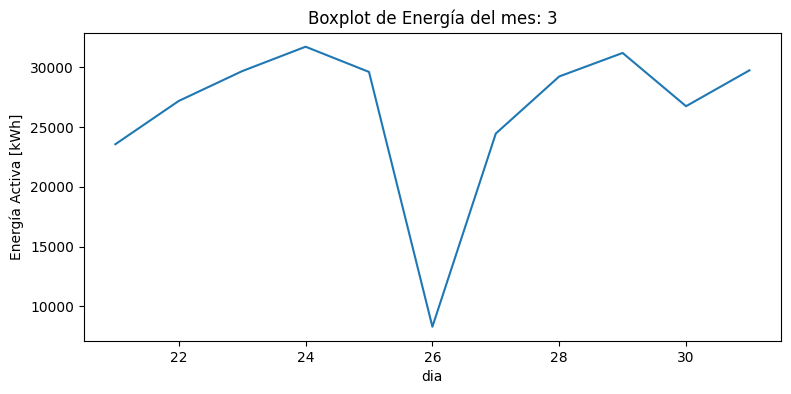

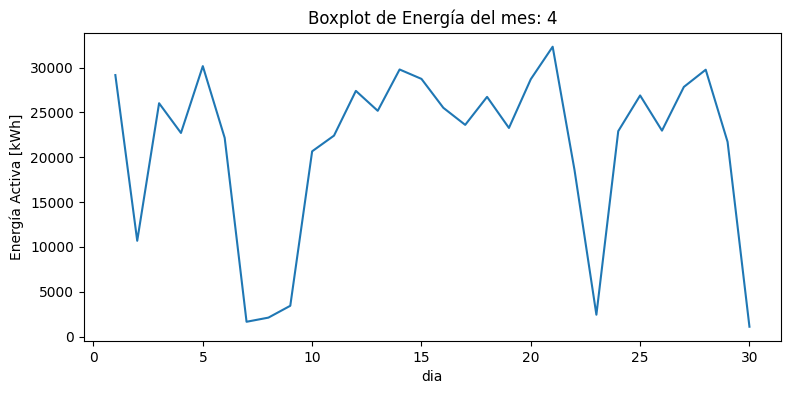

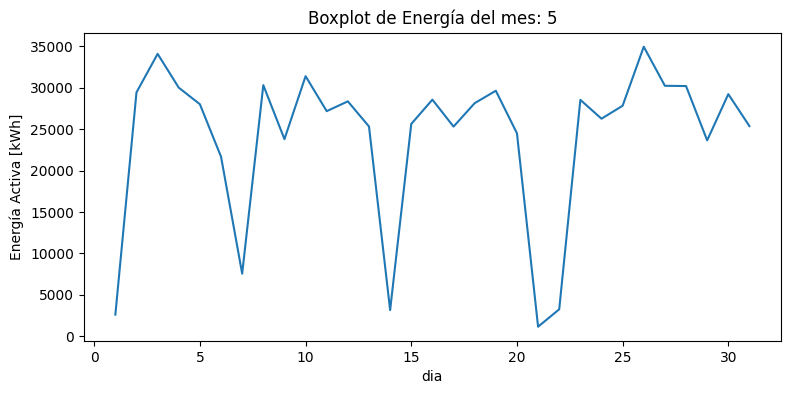

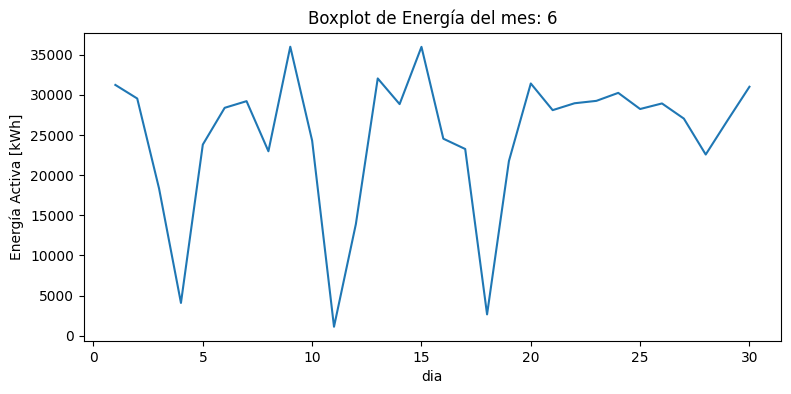

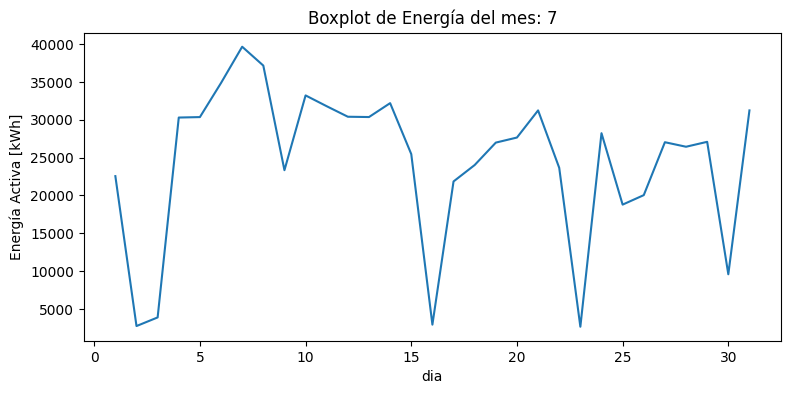

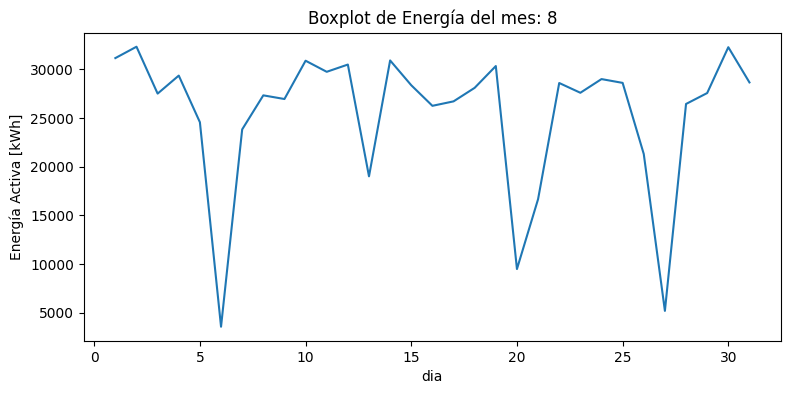

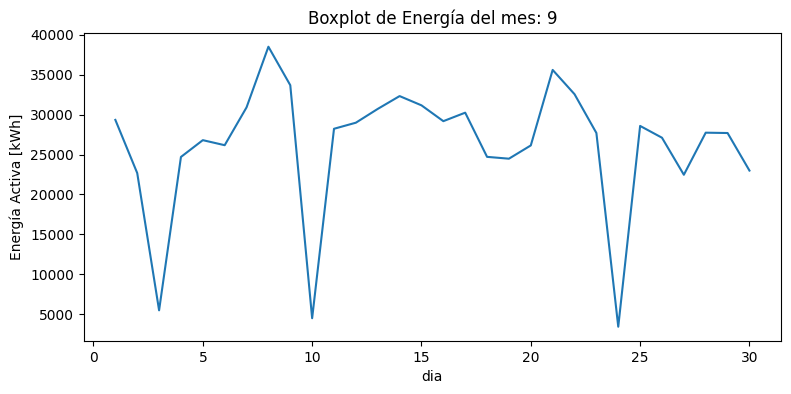

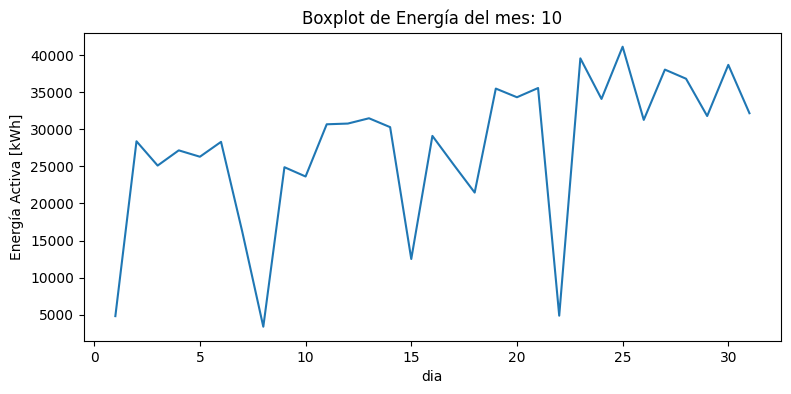

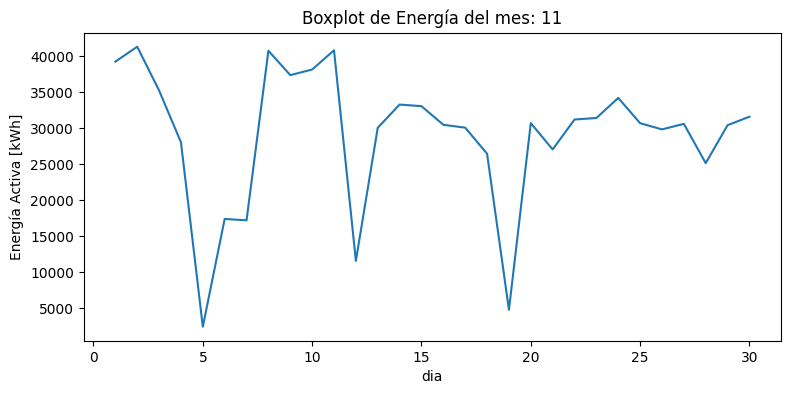

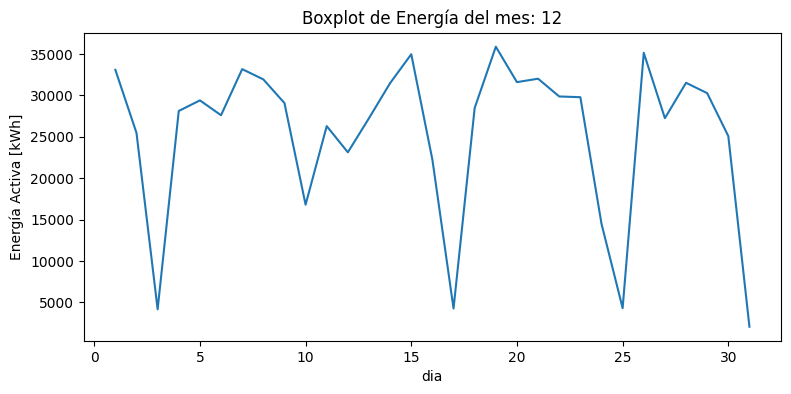

In [50]:
for i in range (3,13):
  grafica_dia_linea(i)

con la informacion analizada y la siguiente, podemos concluir que el tamaño de la instalacion solar es >2kW

In [59]:
max_energia_horaria = db['activa_[kwh]'].max()

print(f'El valor máximo de energía activa registrada en una hora es: {max_energia_horaria:.2f} kWh')

El valor máximo de energía activa registrada en una hora es: 2190.75 kWh


Con esta informacion se podría establecer la cantidad de paneles solares requeridos, dimensionamiento terreno, etc y si me interesa tener una instalacion similar analizo este comportamiento de energía, claramente teniendo en cuenta la ubicación.

Hubo dias en los que la producción de energía se concentro en valores muy bajos, esto ya lo hemos discutido, sin embargo para los valores altos se debe principalmente a: producción alta y concentrada es un día con sol brillante y despejado durante la mayor parte de las horas de luz solar además otros factores ambientales pueden contribuir a una producción alta sostenida, como temperaturas moderadas (los paneles solares pueden ser menos eficientes a temperaturas muy altas), baja humedad y ausencia de polvo o suciedad significativa en los paneles.


#3. Conclusiones

Conclusiones Generales del Análisis de Producción de Energía:



*   Datos Completos y Limpios: La base de datos inicial está bien estructurada y completa, sin valores faltantes, y se ha limpiado adecuadamente para facilitar el análisis, incluyendo la estandarización de los nombres de las columnas y la correcta conversión de la columna de fecha.

*   Distribución Temporal de los Datos: Los datos cubren un período significativo, permitiendo un análisis de tendencias anuales y mensuales en la producción de energía activa.

*   Patrón Mensual de Producción: Se observa una clara tendencia mensual en la producción de energía activa promedio a lo largo de 2023. Hubo un valle notable en abril, un aumento gradual hasta un pico en noviembre, y un descenso en diciembre. Este patrón sugiere una fuerte influencia de factores estacionales, probablemente relacionados con los patrones de nubosidad y precipitación en un clima tropical como el de Colombia.

*   Variabilidad Diaria y Días Anómalos: El análisis de los boxplots y gráficos de línea diarios reveló una variabilidad significativa en la producción de energía de un día a otro dentro de cada mes. Crucialmente, se identificaron días específicos en cada mes con producciones de energía atípicamente bajas.
Causas Probables de la Baja Producción: La coincidencia de algunos días de baja producción con domingos y festivos sugiere que la reducción en la demanda interna de la instalación influye en la operación del autogenerador. Otros días de baja producción no relacionados con el calendario indican la probable influencia de condiciones climáticas desfavorables (alta nubosidad, lluvia) o posibles eventos operativos como mantenimientos o fallas parciales del sistema.
*   Estimación de la Capacidad Instalada: Basándonos en el valor máximo de energía activa registrado en un intervalo horario (aproximadamente 2190.75 kWh), se estima que la potencia instalada del autogenerador es de al menos 2190.75 kW. Esto indica una instalación de capacidad considerable, coherente con un autogenerador a gran escala.


*   Relevancia para la Planificación: El análisis detallado del comportamiento de producción de este autogenerador, incluyendo sus patrones mensuales, variabilidad diaria y la ocurrencia de días de baja producción, proporciona una base de referencia valiosa para quienes consideren instalar un autogenerador de tamaño similar. No obstante, se subraya la importancia crítica de analizar las condiciones específicas de la ubicación de cualquier nueva instalación, ya que los factores climáticos locales tienen un impacto directo en la producción.

el siguiente paso será analizar cuánto fue el ahorro en la factura de energía por autogeneracion.

--> otro posible analisis: determinar el tamaño de otro parque solar, con distinta capacidad y simular la energía generada. (Machine learning)
